In [186]:
# 데이터 불러오기 
import pandas as pd 
# 경고 무시하기
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)
import re
post=pd.read_csv("final_DB")
comment=pd.read_csv("final_comment_DB")
post.head()
# comment.head(3)

,date,caption,id,profile,type,caption_and_hashtags,is_video,view_count,video_duration,likes,...,real_ugc,compound,positive,negative,neutral,comment,com_compound,com_positive,com_negative,com_neutral
0,2020-04-09 16:33:28,"over the past few weeks, we’ve gotten lots of ...",1,hilton,GraphVideo,[],True,1730.0,30.3,194,...,False,0.9100,0.304,0.032,0.664,❤️❤️❤️ 💙🍪 👏 we 're pretty excited about it ! 🤤...,0.9929,0.539,0.034,0.427
1,2020-04-06 12:37:22,one million ‘thank-yous’ to the frontline medi...,2,hilton,GraphImage,['hotelsforheroes'],False,NaN,NaN,412,...,False,0.4404,0.209,0.000,0.791,This is awesome ! ! ! 👏👏👏 thank you ! Thank yo...,0.9590,0.311,0.089,0.599
2,2020-04-03 15:31:01,we’re joining with hotels across the world to ...,3,hilton,GraphSidecar,['hope'],False,NaN,NaN,418,...,False,0.7964,0.392,0.000,0.608,Build with immortal love 👑 ❤️ 🧡🧡🧡 sooo cutie !...,0.8271,0.401,0.000,0.599
3,2020-03-11 15:54:11,we tend to lose track of things during a stay at,4,hilton,GraphImage,[],False,NaN,NaN,98,...,False,-0.4019,0.000,0.403,0.597,. . . . # staugustine # staugustinefl # staugu...,0.0000,0.000,0.000,1.000
4,2020-03-09 18:02:10,"from lake boca to the beach,",5,hilton,GraphImage,[],False,NaN,NaN,227,...,False,0.0000,0.000,0.000,1.000,. . . . # boca # bocaraton # resortlife # expl...,0.7964,0.228,0.000,0.772


holiday_inn에 대한 comment 정보 다시 풀어 해친다음에 sentiment 계산해서 넣어줍니다.(5/11) 

In [168]:
# post.loc[1532:2200,"comment":"com_neutral"]=new_mat.loc[:,"comment":"com_neutral"].values
# print(post[post["profile"]=="holidayinn"])
# # print(len(new_mat.loc[:,"comment"]))

                     date                                            caption  \
1532  2020-04-07 12:37:02  given the uncertainty around covid- and the fl...   
1533  2020-03-31 14:09:16  caring for people is what we do in hospitality...   
1534  2020-03-06 17:10:13            it's finally friday! nothing like that    
1535  2020-02-27 21:06:10  how many times have you wished for an extra da...   
1536  2020-02-24 15:00:10  an extra day means more laughs, more fun, and ...   
...                   ...                                                ...   
2196  2012-11-09 19:09:13  did you know? we had a mascot for a short peri...   
2197  2012-10-30 15:26:35                                                NaN   
2198  2012-10-29 14:32:56                                   a little creepy    
2199  2012-10-29 14:27:55                                                NaN   
2200  2012-10-15 22:58:55           showing some love for holiday inn hotels   

       id     profile        type  \
15

In [88]:
import ast 
def string_to_list(df,columns):
    df[columns]=df[columns].apply(lambda x: ast.literal_eval(x))
string_to_list(comment,"comment_token")

In [89]:
def clean_text(text):
    # 모두 소문자로 바꿔줍니다,@+word는 모조리 제거해 줍니다.글자 안에 숫자가 들어간 것들도 바꿔줍니다.
    
    text=str(text).lower()
    text=re.sub("@.*","",text)
    text=re.sub("\w*\d\w*","",text)

    
    return text

def tokenize_text(text):
    words_list=text.split()
    
    text= [word for word in words_list if not word in SW if len(word)>1]
    
    return text

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from tqdm import tqdm_notebook

SW=set(stopwords.words("english"))
sentiment=SentimentIntensityAnalyzer()

for i,row in tqdm_notebook(comment.iterrows()):
    val=row["comment_token"]
    total_sentence=[]
    for word in val:
        total_sentence.append(" ".join(word))    
    total_sentence=" ".join(total_sentence)
#     print(total_sentence)
    
    total_sentence=" ".join(tokenize_text(clean_text(total_sentence)))
#     print(total_sentence)
#     print()
    senti_scores=sentiment.polarity_scores(total_sentence)
    comment.loc[i,"compound"]=senti_scores["compound"]
    comment.loc[i,"negative"]=senti_scores["neg"]
    comment.loc[i,"positive"]=senti_scores["pos"]
    comment.loc[i,"neutral"]=senti_scores["neu"]
comment.head()

,post_id,comment_token,compound,positive,negative,Profile,neutral,comment
0,1,"[[❤️❤️❤️, 💙🍪], [👏, we, 're, pretty, excited, a...",0.9929,0.539,0.034,hilton,0.427,❤️❤️❤️ 💙🍪 👏 we 're pretty excited about it ! 🤤...
1,2,"[[This, is, awesome, !, !, !, 👏👏👏, thank, you,...",0.9590,0.311,0.089,hilton,0.599,This is awesome ! ! ! 👏👏👏 thank you ! Thank yo...
2,3,"[[Build, with, immortal, love, 👑], [❤️], [🧡🧡🧡]...",0.8271,0.401,0.000,hilton,0.599,Build with immortal love 👑 ❤️ 🧡🧡🧡 sooo cutie !...
3,4,"[[., ., ., ., #, staugustine, #, staugustinefl...",0.0000,0.000,0.000,hilton,1.000,. . . . # staugustine # staugustinefl # staugu...
4,5,"[[., ., ., ., #, boca, #, bocaraton, #, resort...",0.7964,0.228,0.000,hilton,0.772,. . . . # boca # bocaraton # resortlife # expl...


In [91]:
comment.loc[:,"com_compound"]=comment["compound"]
comment.loc[:,"com_positive"]=comment["positive"]
comment.loc[:,"com_negative"]=comment["negative"]
comment.loc[:,"com_neutral"]=comment["neutral"]
comment

,post_id,comment_token,compound,positive,negative,Profile,neutral,comment,com_compound,com_positive,com_negative,com_neutral
0,1,"[[❤️❤️❤️, 💙🍪], [👏, we, 're, pretty, excited, a...",0.9929,0.539,0.034,hilton,0.427,❤️❤️❤️ 💙🍪 👏 we 're pretty excited about it ! 🤤...,0.9929,0.539,0.034,0.427
1,2,"[[This, is, awesome, !, !, !, 👏👏👏, thank, you,...",0.9590,0.311,0.089,hilton,0.599,This is awesome ! ! ! 👏👏👏 thank you ! Thank yo...,0.9590,0.311,0.089,0.599
2,3,"[[Build, with, immortal, love, 👑], [❤️], [🧡🧡🧡]...",0.8271,0.401,0.000,hilton,0.599,Build with immortal love 👑 ❤️ 🧡🧡🧡 sooo cutie !...,0.8271,0.401,0.000,0.599
3,4,"[[., ., ., ., #, staugustine, #, staugustinefl...",0.0000,0.000,0.000,hilton,1.000,. . . . # staugustine # staugustinefl # staugu...,0.0000,0.000,0.000,1.000
4,5,"[[., ., ., ., #, boca, #, bocaraton, #, resort...",0.7964,0.228,0.000,hilton,0.772,. . . . # boca # bocaraton # resortlife # expl...,0.7964,0.228,0.000,0.772
...,...,...,...,...,...,...,...,...,...,...,...,...
2574,375,"[[., ., ., ., ., #, WyndhamRewards, #, Hotel, ...",0.4160,0.126,0.112,wyndham,0.762,. . . . . # WyndhamRewards # Hotel # HotelLife...,0.4160,0.126,0.112,0.762
2575,376,"[[#, WyndhamRewards, #, Hotel, #, HotelLife, #...",0.6780,0.135,0.107,wyndham,0.758,# WyndhamRewards # Hotel # HotelLife # HotelRo...,0.6780,0.135,0.107,0.758
2576,377,"[[., ., ., ., ., #, Hotel, #, Hotels, #, Resor...",0.4160,0.124,0.110,wyndham,0.767,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.4160,0.124,0.110,0.767
2577,378,"[[., ., ., ., ., #, Hotel, #, Hotels, #, Resor...",0.4160,0.126,0.112,wyndham,0.762,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.4160,0.126,0.112,0.762


In [92]:
comment.drop(["compound","positive","negative","neutral","comment_token"],axis=1,inplace=True)
comment

,post_id,Profile,comment,com_compound,com_positive,com_negative,com_neutral
0,1,hilton,❤️❤️❤️ 💙🍪 👏 we 're pretty excited about it ! 🤤...,0.9929,0.539,0.034,0.427
1,2,hilton,This is awesome ! ! ! 👏👏👏 thank you ! Thank yo...,0.9590,0.311,0.089,0.599
2,3,hilton,Build with immortal love 👑 ❤️ 🧡🧡🧡 sooo cutie !...,0.8271,0.401,0.000,0.599
3,4,hilton,. . . . # staugustine # staugustinefl # staugu...,0.0000,0.000,0.000,1.000
4,5,hilton,. . . . # boca # bocaraton # resortlife # expl...,0.7964,0.228,0.000,0.772
...,...,...,...,...,...,...,...
2574,375,wyndham,. . . . . # WyndhamRewards # Hotel # HotelLife...,0.4160,0.126,0.112,0.762
2575,376,wyndham,# WyndhamRewards # Hotel # HotelLife # HotelRo...,0.6780,0.135,0.107,0.758
2576,377,wyndham,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.4160,0.124,0.110,0.767
2577,378,wyndham,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.4160,0.126,0.112,0.762


In [97]:
comment.loc[:,"profile"]=comment["Profile"]
comment.loc[:,"id"]=comment["post_id"]
comment

,post_id,Profile,comment,com_compound,com_positive,com_negative,com_neutral,profile,id
0,1,hilton,❤️❤️❤️ 💙🍪 👏 we 're pretty excited about it ! 🤤...,0.9929,0.539,0.034,0.427,hilton,1
1,2,hilton,This is awesome ! ! ! 👏👏👏 thank you ! Thank yo...,0.9590,0.311,0.089,0.599,hilton,2
2,3,hilton,Build with immortal love 👑 ❤️ 🧡🧡🧡 sooo cutie !...,0.8271,0.401,0.000,0.599,hilton,3
3,4,hilton,. . . . # staugustine # staugustinefl # staugu...,0.0000,0.000,0.000,1.000,hilton,4
4,5,hilton,. . . . # boca # bocaraton # resortlife # expl...,0.7964,0.228,0.000,0.772,hilton,5
...,...,...,...,...,...,...,...,...,...
2574,375,wyndham,. . . . . # WyndhamRewards # Hotel # HotelLife...,0.4160,0.126,0.112,0.762,wyndham,375
2575,376,wyndham,# WyndhamRewards # Hotel # HotelLife # HotelRo...,0.6780,0.135,0.107,0.758,wyndham,376
2576,377,wyndham,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.4160,0.124,0.110,0.767,wyndham,377
2577,378,wyndham,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.4160,0.126,0.112,0.762,wyndham,378


In [100]:
comment.to_csv("final_comment_DB",index=False)

In [107]:
comment[comment["profile"]=="holiday_inn"]="holidayinn"
comment["profile"].unique()

array(['hilton', 'hyatt', 'holidayinn', 'wyndham'], dtype=object)

In [110]:
print(post["profile"].unique())
print(comment["profile"].unique())

['hilton' 'hyatt' 'holidayinn' 'wyndham']
['hilton' 'hyatt' 'holidayinn' 'wyndham']


In [113]:
# 전체 데이터 합치기 
final_DB=pd.merge(right=comment,left=post,how="left",on=["id","profile"],sort=False)
final_DB["profile"].unique()

array(['hilton', 'hyatt', 'holidayinn', 'wyndham'], dtype=object)

In [173]:
final_DB["profile"].unique()

array(['hilton', 'hyatt', 'holidayinn', 'wyndham'], dtype=object)

회사별 comment가 가지고 있는 극값과 caption이 가지고 있는 극값 비교하기

In [174]:
final_DB[final_DB["profile"]=="holidayinn"]

,date,caption,id,profile,type,caption_and_hashtags,is_video,view_count,video_duration,likes,...,real_ugc,compound,positive,negative,neutral,comment,com_compound,com_positive,com_negative,com_neutral
1532,2020-04-07 12:37:02,given the uncertainty around covid- and the fl...,1,holidayinn,GraphImage,[],False,NaN,NaN,284,...,False,-0.2500,0.090,0.164,0.746,🤗 😀 Sounds awesome ! 👍🏼😎❤️ 😀 we completely agr...,0.9899,0.597,0.000,0.403
1533,2020-03-31 14:09:16,caring for people is what we do in hospitality...,2,holidayinn,GraphVideo,"['ihg', 'truehospitality', 'lightsoflove']",True,2184.0,58.1,332,...,False,0.7906,0.444,0.000,0.556,I love what they doing 😍 we absolutely do too ...,0.9879,0.599,0.039,0.361
1534,2020-03-06 17:10:13,it's finally friday! nothing like that,3,holidayinn,GraphImage,"['fridayfeeling', 'bethereirl', 'holidayinnres...",False,NaN,NaN,239,...,False,-0.3404,0.000,0.445,0.555,"hi , I would like to know how can I apply to w...",0.9766,0.375,0.000,0.625
1535,2020-02-27 21:06:10,how many times have you wished for an extra da...,4,holidayinn,GraphImage,[],False,NaN,NaN,252,...,False,0.9129,0.513,0.000,0.487,I booked chandighar and amritsar but I have to...,0.9800,0.313,0.123,0.564
1536,2020-02-24 15:00:10,"an extra day means more laughs, more fun, and ...",5,holidayinn,GraphImage,"['leapyear', 'bethereirl']",False,NaN,NaN,355,...,False,0.7579,0.394,0.000,0.606,I 'm missing Grand Hyatt Rio de Janeiro alread...,0.9998,0.361,0.059,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2012-11-09 19:09:13,did you know? we had a mascot for a short peri...,665,holidayinn,GraphImage,[],False,NaN,NaN,17,...,False,0.4019,0.162,0.000,0.838,😍😍😍😍 Wish we were there our next place,0.4019,0.474,0.000,0.526
2197,2012-10-30 15:26:35,NaN,666,holidayinn,GraphImage,"['donotdisturb', 'hotel']",False,NaN,NaN,31,...,False,0.0000,0.000,0.000,0.000,🍩🍩🍩 have you seen these ? ? Omg ! Now all you ...,0.8771,0.181,0.055,0.764
2198,2012-10-29 14:32:56,a little creepy,667,holidayinn,GraphImage,['halloween'],False,NaN,NaN,18,...,False,0.0000,0.000,0.000,1.000,We stayed here ! # GHTB tampa bay ! Tampa bay...,0.5994,0.231,0.000,0.769
2199,2012-10-29 14:27:55,NaN,668,holidayinn,GraphImage,"['behindthescenes', 'halloween']",False,NaN,NaN,26,...,False,0.0000,0.000,0.000,0.000,I want that ! 😍 Looks like the perfect cup rig...,0.9519,0.398,0.051,0.551


In [115]:
final_DB.drop(["caption_token"],axis=1,inplace=True)
final_DB

,date,caption,id,profile,type,caption_and_hashtags,is_video,view_count,video_duration,likes,...,real_ugc,compound,positive,negative,neutral,comment,com_compound,com_positive,com_negative,com_neutral
0,2020-04-09 16:33:28,"over the past few weeks, we’ve gotten lots of ...",1,hilton,GraphVideo,[],True,1730.0,30.3,194,...,False,0.9100,0.304,0.032,0.664,❤️❤️❤️ 💙🍪 👏 we 're pretty excited about it ! 🤤...,0.9929,0.539,0.034,0.427
1,2020-04-06 12:37:22,one million ‘thank-yous’ to the frontline medi...,2,hilton,GraphImage,['hotelsforheroes'],False,NaN,NaN,412,...,False,0.4404,0.209,0.000,0.791,This is awesome ! ! ! 👏👏👏 thank you ! Thank yo...,0.959,0.311,0.089,0.599
2,2020-04-03 15:31:01,we’re joining with hotels across the world to ...,3,hilton,GraphSidecar,['hope'],False,NaN,NaN,418,...,False,0.7964,0.392,0.000,0.608,Build with immortal love 👑 ❤️ 🧡🧡🧡 sooo cutie !...,0.8271,0.401,0,0.599
3,2020-03-11 15:54:11,we tend to lose track of things during a stay at,4,hilton,GraphImage,[],False,NaN,NaN,98,...,False,-0.4019,0.000,0.403,0.597,. . . . # staugustine # staugustinefl # staugu...,0,0,0,1
4,2020-03-09 18:02:10,"from lake boca to the beach,",5,hilton,GraphImage,[],False,NaN,NaN,227,...,False,0.0000,0.000,0.000,1.000,. . . . # boca # bocaraton # resortlife # expl...,0.7964,0.228,0,0.772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,2018-04-27 17:30:46,a quick bite by the pool at,375,wyndham,GraphImage,"['wyndham', 'wyndhamhotelsandresorts']",False,NaN,NaN,52,...,True,0.0000,0.000,0.000,1.000,. . . . . # WyndhamRewards # Hotel # HotelLife...,0.416,0.126,0.112,0.762
2579,2018-04-25 21:39:31,time to feed the frigatebirds at,376,wyndham,GraphImage,"['wyndham', 'wyndhamhotelsandresorts']",False,NaN,NaN,45,...,True,0.0000,0.000,0.000,1.000,# WyndhamRewards # Hotel # HotelLife # HotelRo...,0.678,0.135,0.107,0.758
2580,2018-04-23 15:56:46,welcome to a place where you have room to be y...,377,wyndham,GraphImage,"['wyndham', 'wyndhamhotelsandresorts']",False,NaN,NaN,33,...,False,0.4588,0.500,0.000,0.500,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.416,0.124,0.11,0.767
2581,2018-04-23 15:56:32,welcome to a place where you have room to be y...,378,wyndham,GraphImage,"['wyndham', 'wyndhamhotelsandresorts']",False,NaN,NaN,43,...,False,0.4588,0.500,0.000,0.500,. . . . . # Hotel # Hotels # Resorts # HotelSt...,0.416,0.126,0.112,0.762


In [185]:
final_DB[final_DB["profile"]=="holidayinn"]

,date,caption,id,profile,type,caption_and_hashtags,is_video,view_count,video_duration,likes,...,real_ugc,compound,positive,negative,neutral,comment,com_compound,com_positive,com_negative,com_neutral
1532,2020-04-07 12:37:02,given the uncertainty around covid- and the fl...,1,holidayinn,GraphImage,[],False,NaN,NaN,284,...,False,-0.2500,0.090,0.164,0.746,🤗 😀 Sounds awesome ! 👍🏼😎❤️ 😀 we completely agr...,0.9899,0.597,0.000,0.403
1533,2020-03-31 14:09:16,caring for people is what we do in hospitality...,2,holidayinn,GraphVideo,"['ihg', 'truehospitality', 'lightsoflove']",True,2184.0,58.1,332,...,False,0.7906,0.444,0.000,0.556,I love what they doing 😍 we absolutely do too ...,0.9879,0.599,0.039,0.361
1534,2020-03-06 17:10:13,it's finally friday! nothing like that,3,holidayinn,GraphImage,"['fridayfeeling', 'bethereirl', 'holidayinnres...",False,NaN,NaN,239,...,False,-0.3404,0.000,0.445,0.555,"hi , I would like to know how can I apply to w...",0.9766,0.375,0.000,0.625
1535,2020-02-27 21:06:10,how many times have you wished for an extra da...,4,holidayinn,GraphImage,[],False,NaN,NaN,252,...,False,0.9129,0.513,0.000,0.487,I booked chandighar and amritsar but I have to...,0.9800,0.313,0.123,0.564
1536,2020-02-24 15:00:10,"an extra day means more laughs, more fun, and ...",5,holidayinn,GraphImage,"['leapyear', 'bethereirl']",False,NaN,NaN,355,...,False,0.7579,0.394,0.000,0.606,I 'm missing Grand Hyatt Rio de Janeiro alread...,0.9998,0.361,0.059,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2012-11-09 19:09:13,did you know? we had a mascot for a short peri...,665,holidayinn,GraphImage,[],False,NaN,NaN,17,...,False,0.4019,0.162,0.000,0.838,😍😍😍😍 Wish we were there our next place,0.4019,0.474,0.000,0.526
2197,2012-10-30 15:26:35,NaN,666,holidayinn,GraphImage,"['donotdisturb', 'hotel']",False,NaN,NaN,31,...,False,0.0000,0.000,0.000,0.000,🍩🍩🍩 have you seen these ? ? Omg ! Now all you ...,0.8771,0.181,0.055,0.764
2198,2012-10-29 14:32:56,a little creepy,667,holidayinn,GraphImage,['halloween'],False,NaN,NaN,18,...,False,0.0000,0.000,0.000,1.000,We stayed here ! # GHTB tampa bay ! Tampa bay...,0.5994,0.231,0.000,0.769
2199,2012-10-29 14:27:55,NaN,668,holidayinn,GraphImage,"['behindthescenes', 'halloween']",False,NaN,NaN,26,...,False,0.0000,0.000,0.000,0.000,I want that ! 😍 Looks like the perfect cup rig...,0.9519,0.398,0.051,0.551


In [175]:
print(len(final_DB.columns))

22


In [176]:
print(final_DB["type"].unique())
print(final_DB["is_video"].unique())

['GraphVideo' 'GraphImage' 'GraphSidecar']
[ True False]


## feature에 대한 조사 

date : 피드가 올라간 날짜를 의미합니다    
caption : 각 피드에 쓴 marketer들이 적어 놓은 문구를 의미합니다. (텍스트 데이터)     
id : 각 post를 구분하기 위해서 쓴 의미 없는 값입니다.     
profile : post를 쓴 회사를 의미합니다 ( hilton, hyatt, holdiday_inn, wyndham 총 4개로 구성)     
type : 인스타그램이 인식하는 피드의 type을 의미합니다. (GraphVideo, GraphImage, GraphSidecar) 총 3가지로 구성    
> Sidecar : collection of multiple image and video.

caption_and_hashtags: marketer가 달아 놓은 caption에서의 hashtag를 의미합니다. (리스트 형식)     
is_video : 해당 게시물이 video인지 아닌지 체크해줍니다. (True/False)    
view_count: 게시물이 video일 경우에만 표시되며 해당 비디오의 조회수를 의미합니다.    
video_duration: 게시물이 video일 경우에만 역시 표시되며 해당 비디오의 길이를 의미합니다.     
likes : 해당 게시물에 대한 사람들의 반응을 나타내는 지표입니다. (Customer engagement)     
comments : 역시 해당 게시물에 대한 사람들의 반응을 나타내는 지표로써 댓글의 수를 의미합니다(본인 댓글 포함)     
caption_tag : 해당 게시물에 다른 계정을 tag했을 경우에 tag한 계정들을 기입합니다(리스트 형식)     
real_ugc : caption에서 다른 사람들을 tag할 때 나타나는 특징인 카메라 모양의이모티콘과 다른 사람을 tag할 경우 ugc라고 정의하였습니다.    
compound, positive, negative, neutral : 각 caption의 sentiment를 vader를 기준으로 점수를 부여했습니다.     
comment: 각 피드에 달려있는 comment들을 text화하였습니다.     
com_compound,com_positive,com_negative,com_neutral : 각 comment들의 sentiment를 vader를 기준으로 점수 부여하였습니다.


## feature조사하면서 느낀점 :
1. 각 feature중 comment에 들어있는 이모티콘에 대한 극값을 어떻게 부여할 것인지를 체크할 필요성을 느낍니다.

In [177]:
final_DB.to_csv("final_DB",index=False)
final_DB.to_excel("final_DB.xlsx",index=False)

In [178]:
hyatt=final_DB[final_DB["profile"]=="hyatt"].reset_index(drop=True)
hilton=final_DB[final_DB["profile"]=="hilton"].reset_index(drop=True)
holiday=final_DB[final_DB["profile"]=="holidayinn"].reset_index(drop=True)
wyndham=final_DB[final_DB["profile"]=="wyndham"].reset_index(drop=True)

In [179]:
final_DB["profile"].unique()

array(['hilton', 'hyatt', 'holidayinn', 'wyndham'], dtype=object)

In [131]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
%matplotlib inline 
from pprint import pprint 
import nltk
from nltk.corpus import stopwords
SW=set(stopwords.words("english"))

In [122]:
def clean_text(text):
    # 모두 소문자로 바꿔줍니다,@+word는 모조리 제거해 줍니다.글자 안에 숫자가 들어간 것들도 바꿔줍니다.
    
    text=str(text).lower()
    text=re.sub("@.*","",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("#.*","",text)
    
    return text
def tokenize_text(text):
    words_list=text.split()
    
    text= [word for word in words_list if not word in SW if len(word)>1]
    
    return text

In [123]:
all_=[" ".join(tokenize_text(clean_text(sentence))) for sentence in hyatt["comment"]]
all_=" ".join(all_)
text=re.sub("  "," ",all_)
# print(text)
text=nltk.Text(text.split(),name="hyatt")
pprint(text.vocab().most_common())

[('hyatt', 594),
 ('love', 418),
 ('beautiful', 283),
 ('go', 264),
 ('hotel', 259),
 ("'s", 236),
 ('great', 209),
 ('...', 207),
 ('stay', 203),
 ('nice', 196),
 ('amazing', 192),
 ('one', 189),
 ("n't", 185),
 ('please', 169),
 ('place', 165),
 ('us', 155),
 ('like', 151),
 ('thank', 149),
 ('wait', 141),
 ('thanks', 140),
 ('wow', 136),
 ('back', 135),
 ('let', 133),
 ('looks', 133),
 ('best', 132),
 ('next', 130),
 ('nan', 127),
 ('❤️', 122),
 ('need', 122),
 ('would', 119),
 ('yes', 108),
 ('awesome', 107),
 ('soon', 105),
 ('ca', 102),
 ('good', 95),
 ('see', 91),
 ('post', 88),
 ('look', 87),
 ('want', 86),
 ('get', 83),
 ("'m", 82),
 ('know', 81),
 ('visit', 81),
 ('favorite', 75),
 ('view', 73),
 ('hotels', 72),
 ('time', 71),
 ('check', 70),
 ('hope', 69),
 ('regency', 69),
 ('cool', 68),
 ('lovely', 66),
 ('😍😍😍', 64),
 ('day', 63),
 ('property', 62),
 ('staying', 61),
 ('stunning', 60),
 ('much', 59),
 ('photo', 59),
 ("'ll", 59),
 ('new', 59),
 ('dm', 58),
 ('year', 58),
 

 ('bungalows', 1),
 ('need.to.go.there.now', 1),
 ('🦋🌈😍', 1),
 ('❤️👌❤️', 1),
 ('beautiful😀', 1),
 ('thompson', 1),
 ('👋👋👋👋👋', 1),
 ('🙋🏾\u200d♀️😏', 1),
 ('🏊\u200d♂️🏊\u200d♂️🏊\u200d♂️', 1),
 ('🙌🙌🙌🙌', 1),
 ('❤️this', 1),
 ('bientôt', 1),
 ('shot❤️❤️❤️', 1),
 ('👊👍', 1),
 ('contacted', 1),
 ('missin', 1),
 ('bottle', 1),
 ('dipped', 1),
 ('strawberries', 1),
 ('service.❤️❤️❤️', 1),
 ('seasons', 1),
 ('sao', 1),
 ('paulo', 1),
 ('\U0001f929✨\U0001f968', 1),
 ('.dns', 1),
 ('favourites', 1),
 ("'feel", 1),
 ('staircase', 1),
 ('.official', 1),
 ('^hyattconcierge', 1),
 ('welcome💖', 1),
 ('holley', 1),
 ('.a.y.a_r.s_', 1),
 ('vayyy', 1),
 ('delam', 1),
 ('khast', 1),
 ('\U0001f970😍', 1),
 ('leider', 1),
 ('berghain', 1),
 ('😊🥂', 1),
 ('been😁😁', 1),
 ('list😍', 1),
 ('quiet', 1),
 ('gte', 1),
 ('lembro', 1),
 ('ons', 1),
 ('vorige', 1),
 ('tripje', 1),
 ('\U0001f929👌🏼', 1),
 ('summertime', 1),
 ('by..', 1),
 ('👌🏻😍', 1),
 ('worse', 1),
 ('انا', 1),
 ('اقمت', 1),
 ('الفندق', 1),
 ('قبل', 1),
 ('تق

 ('woww', 1),
 ('tagged', 1),
 ('chillax', 1),
 ('vacationing', 1),
 ('sarrasota', 1),
 ('day~~', 1),
 ('butter', 1),
 ('👍😃✨', 1),
 ('😍😁', 1),
 ('yay~~', 1),
 ('astaga', 1),
 ('bushgardens', 1),
 ('destionation', 1),
 ('amin', 1),
 ('furious', 1),
 ('måste', 1),
 ('pht', 1),
 ('boka', 1),
 ('xoxo', 1),
 ('fantabulous', 1),
 ('ocean', 1),
 ('kaanaapali', 1),
 ('celebrating', 1),
 ('cinco', 1),
 ('vacation..asap', 1),
 ('port', 1),
 ('💯🙌🏾💯🙌🏾💯🙌🏾my', 1),
 ('tst', 1),
 ('💐🌸🌷🌺🌼', 1),
 ('complimentary', 1),
 ('beeeeeeaaaautiful', 1),
 ("'ohana", 1),
 ('pistachio', 1),
 ('raspberry', 1),
 ('cream', 1),
 ('velvet', 1),
 ('wers', 1),
 ('dis', 1),
 ('iz', 1),
 ('gachibowli', 1),
 ('jubilee', 1),
 ('hills', 1),
 ('yogyakarta.java', 1),
 ('borobudur', 1),
 ('temple', 1),
 ('equally', 1),
 ('holes', 1),
 ('wow！', 1),
 ('mangoes', 1),
 ('.💜', 1),
 ('饿了', 1),
 ('placehyatt', 1),
 ('grandhyatt', 1),
 ('fantastisches', 1),
 ('bild', 1),
 ('我的最爱，树莓+蓝莓', 1),
 ('berries', 1),
 ('granolaaaaaaa', 1),
 ('wauw

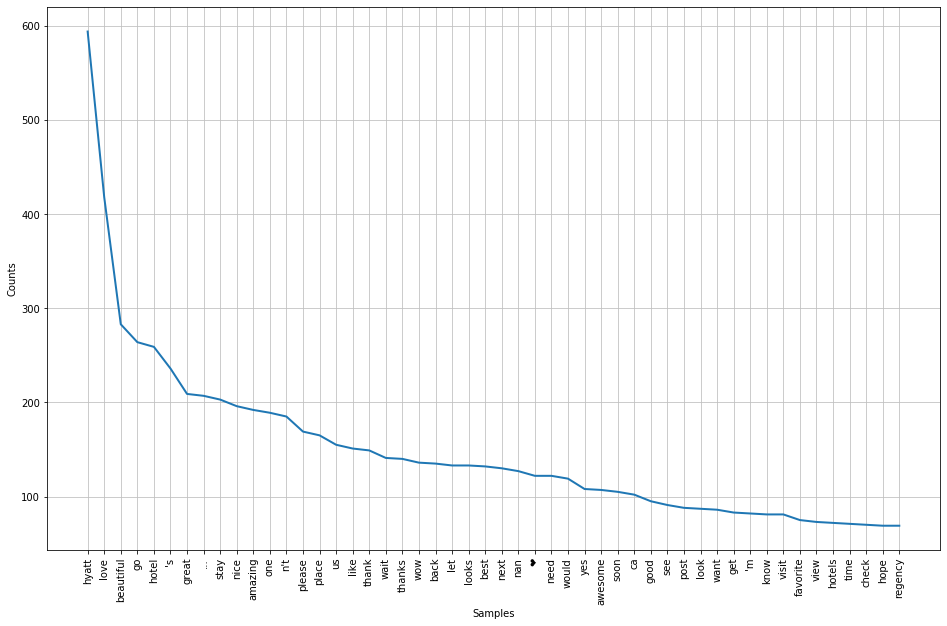

In [124]:
fig= plt.figure(figsize=[16,10])
text.plot(50)
fig.savefig('hyatt_histogram.pdf', ext='pdf');

워드클라우드 

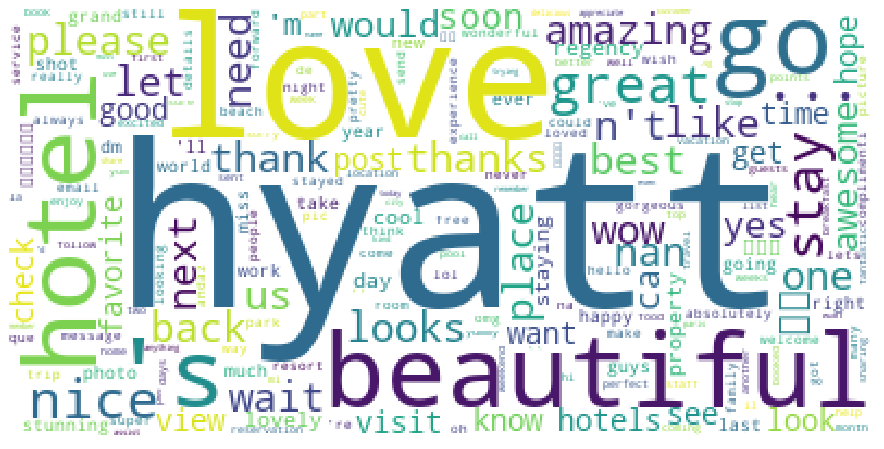

In [125]:
data=text.vocab().most_common()
wordcloud=WordCloud(relative_scaling=0.2,
                   stopwords=STOPWORDS,
                   background_color="white").generate_from_frequencies(dict(data))
fig=plt.figure(figsize=[16,8])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig("hyatt_wordcloud.pdf",ext="pdf")

[('wait', 4),
 ('see', 4),
 ('❤️', 4),
 ('la', 4),
 ('thank', 3),
 ('know', 3),
 ('huasteca', 3),
 ('xilitla', 3),
 ('de', 3),
 ('que', 3),
 ('está', 3),
 ('vamos', 3),
 ('place', 3),
 ('❤️❤️❤️', 2),
 ("'re", 2),
 ('home', 2),
 ('awesome', 2),
 ('miss', 2),
 ('love', 2),
 ('cookies', 2),
 ('make', 2),
 ("n't", 2),
 ('méxico', 2),
 ('like', 2),
 ('uncharted', 2),
 ('potosina', 2),
 ('mi', 2),
 ('si', 2),
 ('belleza', 2),
 ('want', 2),
 ('go', 2),
 ('ahí', 2),
 ('ir', 2),
 ('súper', 2),
 ('bonito', 2),
 ('.o', 2),
 ('...', 2),
 ('photo', 2),
 ('💙🍪', 1),
 ('pretty', 1),
 ('excited', 1),
 ('🤤❤️', 1),
 ('enjoy', 1),
 ('hope', 1),
 ('try', 1),
 ('omg', 1),
 ('\U0001f92f\U0001f92f\U0001f92f', 1),
 ('staying', 1),
 ('hilton', 1),
 ('hotels', 1),
 ('much', 1),
 ('dad', 1),
 ('made', 1),
 ('morning', 1),
 ('haha', 1),
 ('best', 1),
 ('news', 1),
 ('bake', 1),
 ('❤️thank', 1),
 ('super', 1),
 ('team', 1),
 ('welcome', 1),
 ('must', 1),
 ('yes', 1),
 ('please', 1),
 ('forget', 1),
 ('tag', 1),
 ('

C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57194 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunkeun_jo\

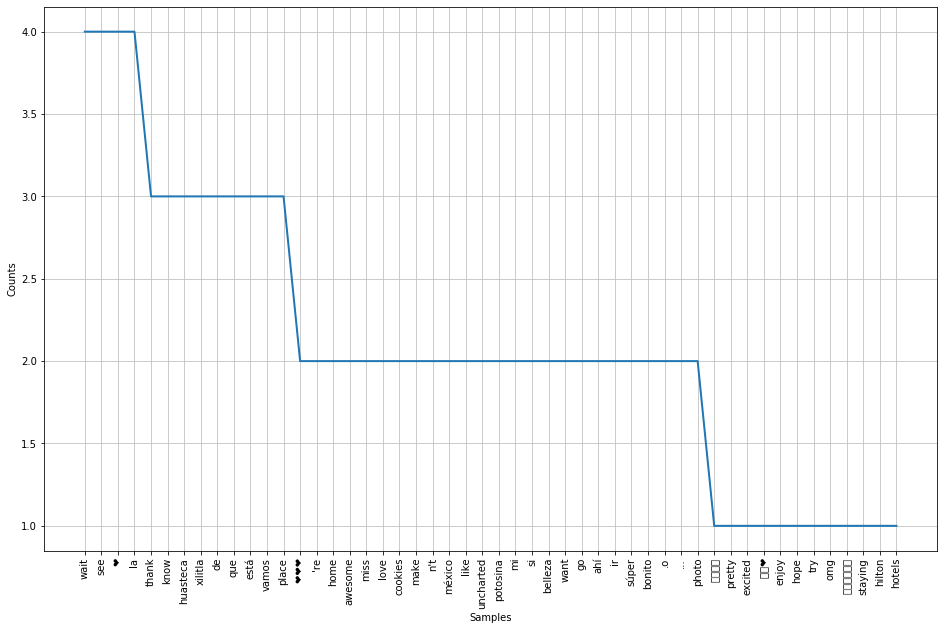

C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 56473 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 57194 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\sunkeun_jo\anaconda3\envs\textmining\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 553

In [202]:
all_=[" ".join(tokenize_text(clean_text(sentence))) for sentence in hilton["comment"]]
all_=" ".join(all_)
text=re.sub("  "," ",all_)
# print(text)
text=nltk.Text(text.split(),name="hilton")
pprint(text.vocab().most_common())

fig= plt.figure(figsize=[16,10])
text.plot(50)
fig.savefig('hilton_histogram.pdf', ext='pdf');



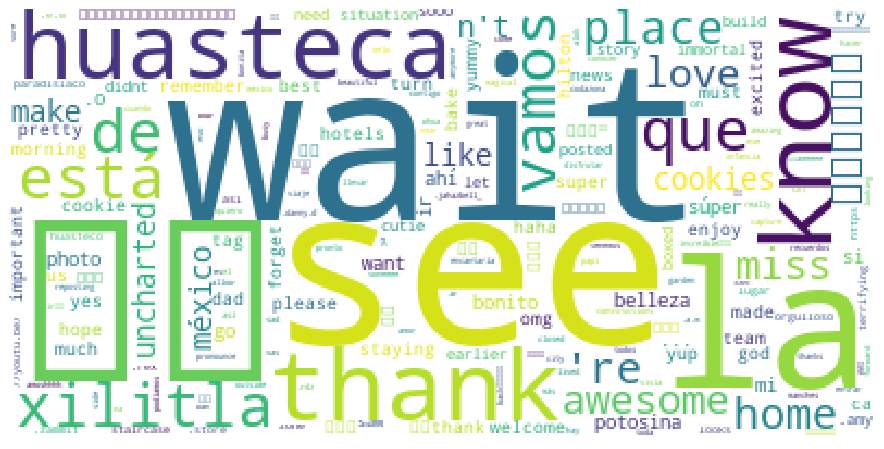

In [203]:
data=text.vocab().most_common()
wordcloud=WordCloud(relative_scaling=0.2,
                   stopwords=STOPWORDS,
                   background_color="white").generate_from_frequencies(dict(data))
fig=plt.figure(figsize=[16,8])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig("hilton_wordcloud.pdf",ext="pdf")

[('hyatt', 372),
 ('love', 241),
 ('beautiful', 183),
 ('hotel', 174),
 ('go', 148),
 ('great', 136),
 ('stay', 131),
 ('one', 129),
 ('amazing', 121),
 ('...', 119),
 ('please', 116),
 ("'s", 113),
 ('nice', 110),
 ('us', 105),
 ('❤️', 100),
 ('like', 99),
 ('thank', 97),
 ('place', 90),
 ('looks', 88),
 ('wow', 87),
 ("n't", 86),
 ('would', 85),
 ('wait', 82),
 ('best', 79),
 ('post', 78),
 ('next', 77),
 ('back', 72),
 ('need', 72),
 ('let', 71),
 ('thanks', 69),
 ('soon', 68),
 ('awesome', 65),
 ('good', 64),
 ('yes', 64),
 ('get', 58),
 ('visit', 57),
 ('see', 55),
 ("'m", 55),
 ('hope', 54),
 ('hotels', 53),
 ('know', 51),
 ('look', 51),
 ('check', 50),
 ('dm', 49),
 ('want', 48),
 ('time', 48),
 ('complimenti', 46),
 ('favorite', 45),
 ('❤️❤️❤️', 43),
 ('staying', 43),
 ('cool', 43),
 ('stunning', 42),
 ('😍😍😍', 41),
 ('happy', 41),
 ('absolutely', 40),
 ('world', 40),
 ('ca', 40),
 ('day', 39),
 ('lovely', 39),
 ('property', 39),
 ('view', 39),
 ('year', 38),
 ('😍😍', 37),
 ('new

 ('earning', 2),
 ('count', 2),
 ('globalists', 2),
 ('improve', 2),
 ('😍😍😍😍😍😍', 2),
 ('😍✨', 2),
 ('unauthorized', 2),
 ('fixed', 2),
 ('owe', 2),
 ('least', 2),
 ('👍🏻🙂', 2),
 ('upgrade', 2),
 ('shanghai', 2),
 ('marvelous', 2),
 ('pero', 2),
 ('parte', 2),
 ('ustedes', 2),
 ('fué', 2),
 ('headed', 2),
 ('largest', 2),
 ('precious', 2),
 ('🐶😍', 2),
 ('citizen', 2),
 ('relaxation', 2),
 ('aruba', 2),
 ('side', 2),
 ('hace', 2),
 ('👌🏾', 2),
 ('trust', 2),
 ('easy', 2),
 ('believe', 2),
 ('hosting', 2),
 ('dreaming', 2),
 ('colours', 2),
 ('😍😎', 2),
 ('saving', 2),
 ('referral', 2),
 ('noches', 2),
 ('died', 2),
 ('dude', 2),
 ('🐢💚', 2),
 ('issues', 2),
 ('belgrade', 2),
 ('regis', 2),
 ('land', 2),
 ('hmmm', 2),
 ('ticket', 2),
 ('lean', 2),
 ('anda', 2),
 ('dengan', 2),
 ('yang', 2),
 ('dan', 2),
 ('bishkek', 2),
 ('act', 2),
 ('hate', 2),
 ('serving', 2),
 ('groups', 2),
 ('diversity', 2),
 ('space', 2),
 ('sucks', 2),
 ('👍🏼👍🏼👍🏼👍🏼', 2),
 ('spread', 2),
 ('colorful', 2),
 ('soo', 2),
 (

 ('🍒🍒🍒🍒🍓🍍🍍🍍🍍💋', 1),
 ('📸check', 1),
 ('think.🤗', 1),
 ('encanta', 1),
 ('hug', 1),
 ('🤙🏽', 1),
 ('💙💛', 1),
 ('nab', 1),
 ('rsvp', 1),
 ('contents', 1),
 ('woow', 1),
 ('😍❤', 1),
 ('♥️♥️', 1),
 ('tone-deaf', 1),
 ('undisturbed', 1),
 ('obstacles', 1),
 ('fittest', 1),
 ('odd', 1),
 ('turtles', 1),
 ('awwwww', 1),
 ('lleva', 1),
 ('tuya', 1),
 ('playa', 1),
 ('cuisines', 1),
 ('shame', 1),
 ('morons', 1),
 ('moscow', 1),
 ('быдло', 1),
 ('охрана', 1),
 ('очень', 1),
 ('плохой', 1),
 ('сервис', 1),
 ('sponsored', 1),
 ('spam', 1),
 ('bs', 1),
 ('cancer', 1),
 ('blocked', 1),
 ('👍⃣', 1),
 ('competition', 1),
 ('💰💰💰', 1),
 ('serbia', 1),
 ('branches', 1),
 ('stationed', 1),
 ('no.', 1),
 ('hayat', 1),
 ('belgrade.very', 1),
 ('😣😣😣😣😣😣😣', 1),
 ('current', 1),
 ('//bevrology.blogspot.com/', 1),
 ('m=', 1),
 ('gni', 1),
 ('fi', 1),
 ('competitive', 1),
 ('starpoints', 1),
 ('marriotts', 1),
 ('price', 1),
 ('usd', 1),
 ('million', 1),
 ('deposited', 1),
 ('avgreat', 1),
 ('pride', 1),
 ('accomm

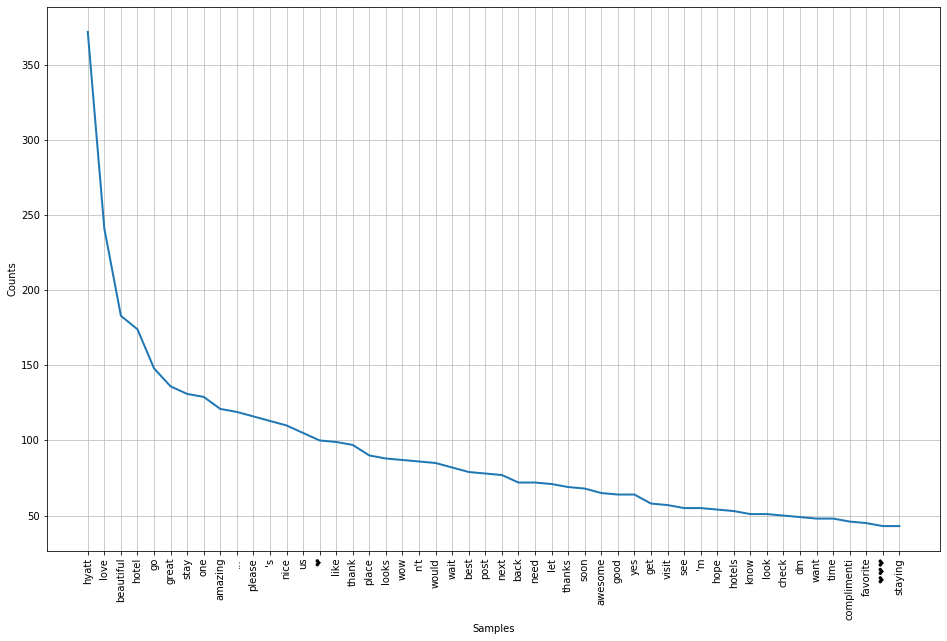

In [181]:
all_=[" ".join(tokenize_text(clean_text(sentence))) for sentence in holiday["comment"]]
all_=" ".join(all_)
text=re.sub("  "," ",all_)
# print(text)
text=nltk.Text(text.split(),name="holiday_inn")
pprint(text.vocab().most_common())

fig= plt.figure(figsize=[16,10])
text.plot(50)
fig.savefig('holiday_inn_histogram.pdf', ext='pdf');



[('money', 56),
 ('hotel', 40),
 ('room', 34),
 ('never', 33),
 ('wyndham', 32),
 ('back', 30),
 ('time', 27),
 ('us', 27),
 ('stay', 27),
 ('one', 26),
 ('company', 26),
 ('get', 24),
 ('desk', 24),
 ('would', 21),
 ('customer', 20),
 ('people', 20),
 ('nothing', 20),
 ('manager', 19),
 ('front', 18),
 ('beautiful', 18),
 ('still', 17),
 ('love', 17),
 ('ever', 17),
 ('thank', 16),
 ('care', 16),
 ('month', 15),
 ('staying', 15),
 ('hope', 14),
 ('anyone', 14),
 ('morning', 14),
 ('even', 14),
 ('go', 14),
 ('made', 14),
 ('called', 13),
 ('property', 13),
 ('refund', 13),
 ('told', 13),
 ('great', 12),
 ('service', 12),
 ('also', 12),
 ('fire', 12),
 ('returned', 12),
 ('complained', 12),
 ('day', 11),
 ('waste', 11),
 ('stayed', 11),
 ('could', 11),
 ('done', 11),
 ('let', 10),
 ('going', 10),
 ('water', 10),
 ('nan', 9),
 ('response', 9),
 ('lobby', 9),
 ('went', 9),
 ('much', 9),
 ('hear', 9),
 ('horrible', 9),
 ('steals', 9),
 ('gone', 9),
 ('--', 9),
 ('cleaned', 9),
 ('first', 

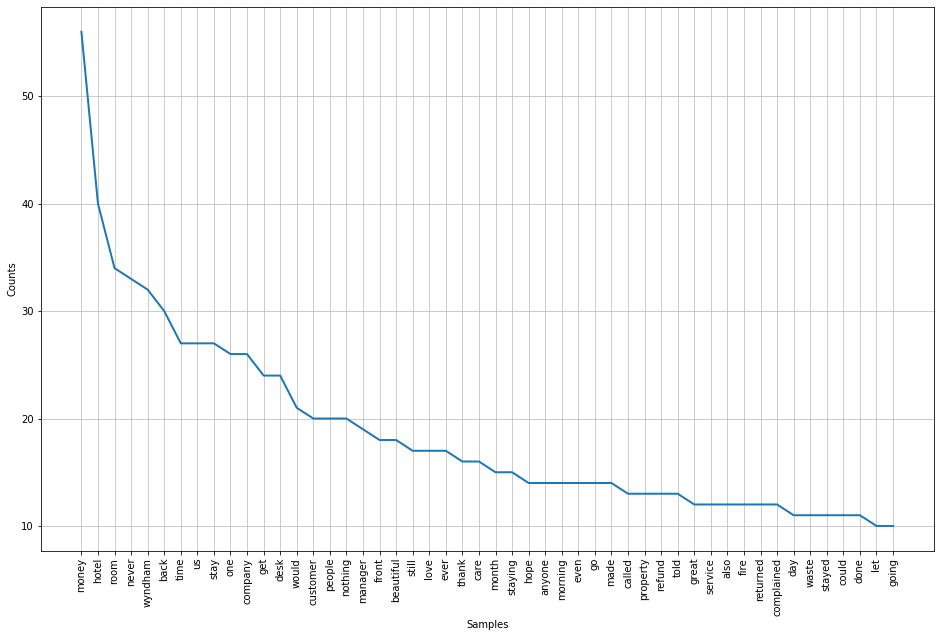

In [199]:
all_=[" ".join(tokenize_text(clean_text(sentence))) for sentence in wyndham["comment"]]
all_=" ".join(all_)
text=re.sub("  "," ",all_)
# print(text)
text=nltk.Text(text.split(),name="wyndham")
pprint(text.vocab().most_common())

fig= plt.figure(figsize=[16,10])
text.plot(50)
fig.savefig('wyndham_histogram.pdf', ext='pdf');



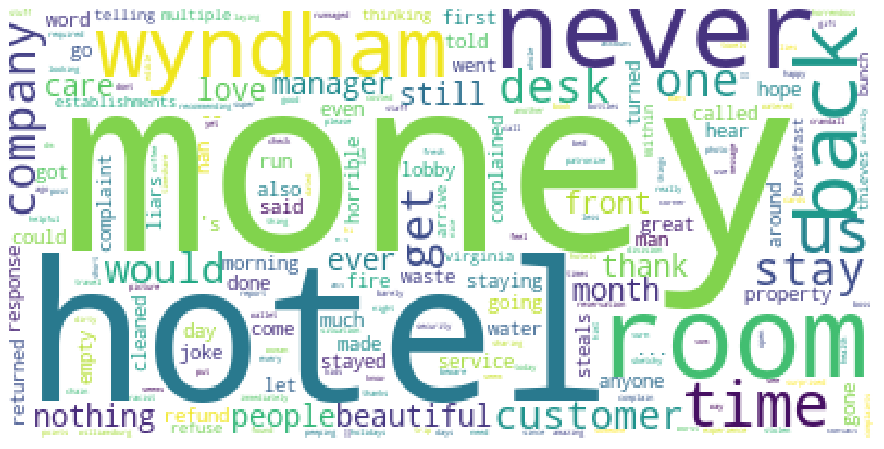

In [201]:
data=text.vocab().most_common()
wordcloud=WordCloud(relative_scaling=0.2,
                   stopwords=STOPWORDS,
                   background_color="white").generate_from_frequencies(dict(data))
fig=plt.figure(figsize=[16,8])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig("wyndham_wordcloud.pdf",ext="pdf")